In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
%matplotlib inline

 Read in csv file as a dataframe called df

In [14]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Check the info of df

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Top 5 zipcodes for 911 cells

In [16]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

Top 5 twp for 911 calls

In [17]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

Number of unique title codes at the title column

In [18]:
df['title'].nunique()

148

In [19]:
x = df['title'].iloc[0]

In [20]:
x

'EMS: BACK PAINS/INJURY'

In [21]:
x.split(':')[0]

'EMS'

In [22]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [23]:
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: reason, Length: 663522, dtype: object

Most common reason for a 911 call 

In [24]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

Count plot for 911 calls by reason

<AxesSubplot:xlabel='reason', ylabel='count'>

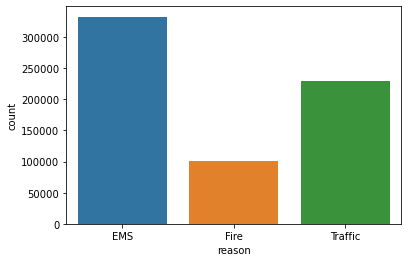

In [25]:
sns.countplot(x='reason', data=df)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


In [27]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

Data type of the objects in the timeStamp column

In [28]:
type(df['timeStamp'].iloc[0])

str

pd.to_datetime to convert the column from strings to Datetime objects.

In [29]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [30]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

You can now grab specific attributes from a Datetime object by calling them

In [31]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [32]:
time

Timestamp('2015-12-10 17:10:52')

In [33]:
time.hour

17

In [34]:
time.dayofweek

3

In [35]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [36]:
df['hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: hour, Length: 663522, dtype: int64

In [37]:
df['month'] = df['timeStamp'].apply(lambda time: time.month)

In [38]:
df['month']

0         12
1         12
2         12
3         12
4         12
          ..
663517     7
663518     7
663519     7
663520     7
663521     7
Name: month, Length: 663522, dtype: int64

In [39]:
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [40]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [41]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [42]:
df['day of week'] = df['day of week'].map(dmap)

In [43]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


use seaborn to create a count plot of the day of week column with the hue based off of the reason column

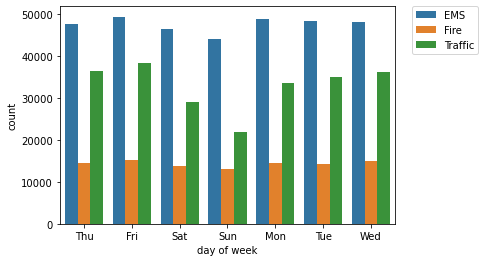

In [44]:
sns.countplot(x='day of week', data=df, hue='reason')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

use seaborn to create a count plot of the month column with the hue based off of the reason column

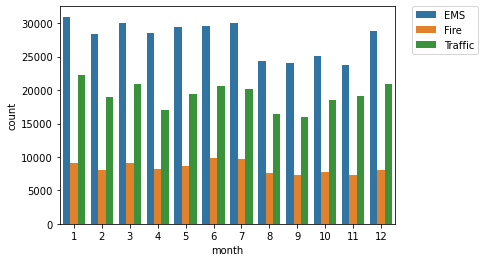

In [45]:
sns.countplot(x='month', data=df, hue='reason')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

create a groupby object called month, use the count() method for aggregation, use the head() method on this returned dataframe

In [46]:
bymonth = df.groupby('month').count()

In [47]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


Create a simple plot of the dataframe indicating the count of calls per month

<AxesSubplot:xlabel='month'>

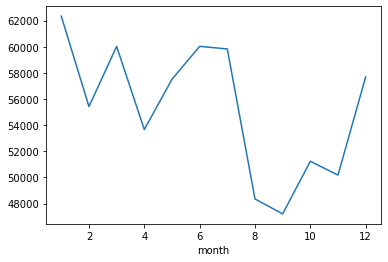

In [48]:
bymonth['lat'].plot()

<AxesSubplot:xlabel='month', ylabel='count'>

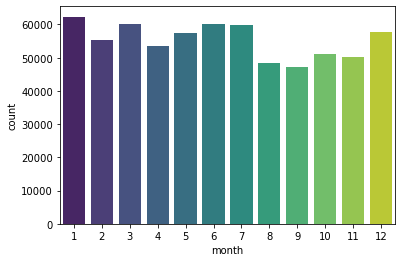

In [53]:
sns.countplot(x='month', data=df, palette = 'viridis')
# To relocate the legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

use seaborn's lmplot() to create a linear fit on the number of calls per month. you may need to reset the index to a column

In [54]:
bymonth.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


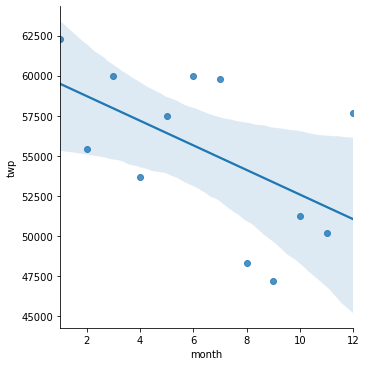

In [55]:
sns.lmplot(x='month', y='twp', data=bymonth.reset_index())

Create a new column called Date that contains the date from the timeStamp column 

In [56]:
t = df['timeStamp'].iloc[0]


In [57]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [58]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

In [59]:
t.date()

datetime.date(2015, 12, 10)

In [52]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


groupby this date column with the count() aggregate and create a plot of counts of 911 calls

In [60]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


In [61]:
df.groupby('Date').count()['lat']

Date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
             ... 
2020-07-25    318
2020-07-26    296
2020-07-27    329
2020-07-28    370
2020-07-29    217
Name: lat, Length: 1694, dtype: int64

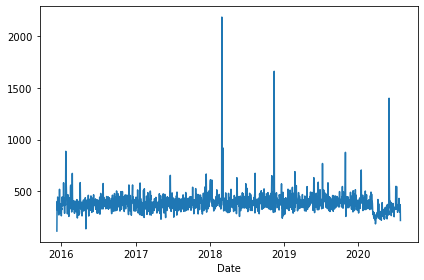

In [57]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

rescreate this plot but create 3 separate plot with each plot representing a reason for 911 calls

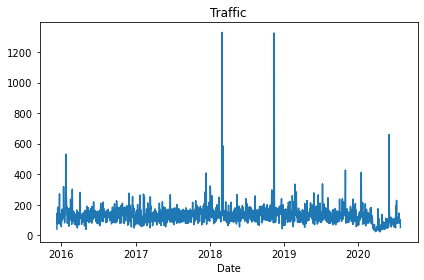

In [60]:
df[df['reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

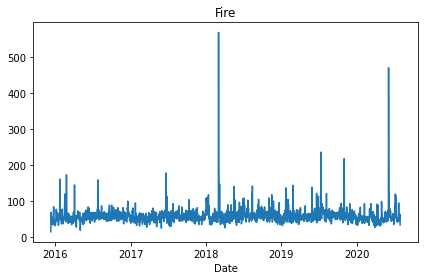

In [61]:
df[df['reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

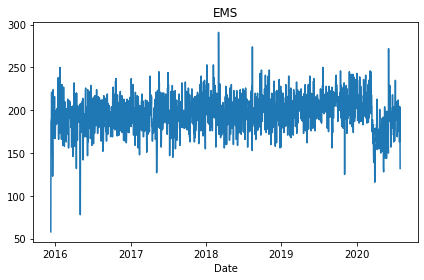

In [62]:
df[df['reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [63]:
df.groupby(by = ['day of week', 'hour']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
day of week hour                                                               
Fri         0     1983  1983  1983  1752   1983       1983  1981  1983  1983   
            1     1635  1635  1635  1451   1635       1635  1632  1635  1635   
            2     1449  1449  1449  1311   1449       1449  1449  1449  1449   
            3     1296  1296  1296  1173   1296       1296  1296  1296  1296   
            4     1339  1339  1339  1227   1339       1339  1338  1339  1339   
...                ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wed         19    4686  4686  4686  4165   4686       4686  4684  4686  4686   
            20    4116  4116  4116  3661   4116       4116  4113  4116  4116   
            21    3537  3537  3537  3143   3537       3537  3530  3537  3537   
            22    2826  2826  2826  2511   2826       2826  2825  2826  2826   
            23    2207  2207  2207  1965   2207       2207  2204  2207  2207   

                  reason  month  Date  
day of week hour                       
Fri         0       1983   1983  1983  
            1       1635   1635  1635  
            2       1449   1449  1449  
            3       1296   1296  1296  
            4       1339   1339  1339  
...                  ...    ...   ...  
Wed         19      4686   4686  4686  
            20      4116   4116  4116  
            21      3537   3537  3537  
            22      2826   2826  2826  
            23      2207   2207  2207  

[168 rows x 12 columns]

In [66]:
df.groupby(by = ['day of week', 'hour']).count()['reason']

day of week  hour
Fri          0       1983
             1       1635
             2       1449
             3       1296
             4       1339
                     ... 
Wed          19      4686
             20      4116
             21      3537
             22      2826
             23      2207
Name: reason, Length: 168, dtype: int64

In [68]:
df.groupby(by = ['day of week', 'hour']).count().unstack()

lat                                                        ...  \
hour           0     1     2     3     4     5     6     7     8     9   ...   
day of week                                                              ...   
Fri          1983  1635  1449  1296  1339  1639  2670  4143  5018  5288  ...   
Mon          1894  1571  1368  1272  1336  1844  2675  4430  5504  5724  ...   
Sat          2447  2059  1883  1592  1451  1580  1880  2489  3457  4315  ...   
Sun          2424  2135  1946  1614  1471  1488  1726  2408  3001  3728  ...   
Thu          1731  1408  1426  1236  1293  1775  2816  4432  5297  5412  ...   
Tue          1720  1459  1322  1213  1247  1741  2784  4425  5634  5566  ...   
Wed          1664  1484  1259  1265  1128  1609  2668  4644  5469  5444  ...   

             Date                                                        
hour           14    15    16    17    18    19    20    21    22    23  
day of week                                                              
Fri          6394  7040  7065  7113  5668  5056  4375  3913  3422  2834  
Mon          5713  6289  6346  6408  5441  4488  3823  3254  2658  2072  
Sat          5421  5181  5211  5213  4980  4753  4127  3895  3226  2965  
Sun          4744  4475  4560  4505  4402  4135  3748  3161  2629  2323  
Thu          6079  6493  6375  6935  5512  4703  4045  3490  2844  2354  
Tue          5926  6252  6495  6883  5628  4621  3845  3409  2708  2137  
Wed          6069  6533  6745  7062  5691  4686  4116  3537  2826  2207  

[7 rows x 288 columns]

In [64]:
dayhour  = df.groupby(by = ['day of week', 'hour']).count()['reason'].unstack()

Create a heatmap using new DataFrame

<AxesSubplot:xlabel='hour', ylabel='day of week'>

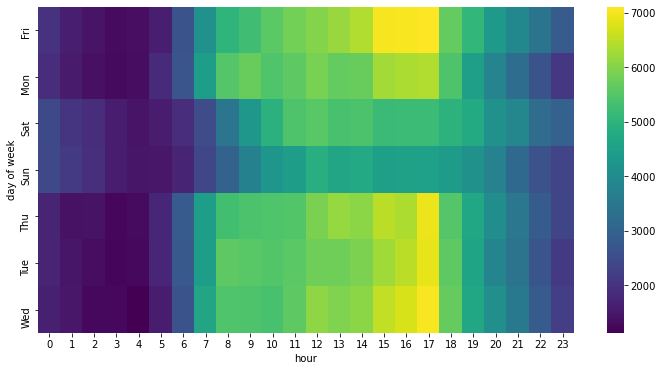

In [65]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayhour, cmap='viridis')

Create a clustermap using this DataFrame

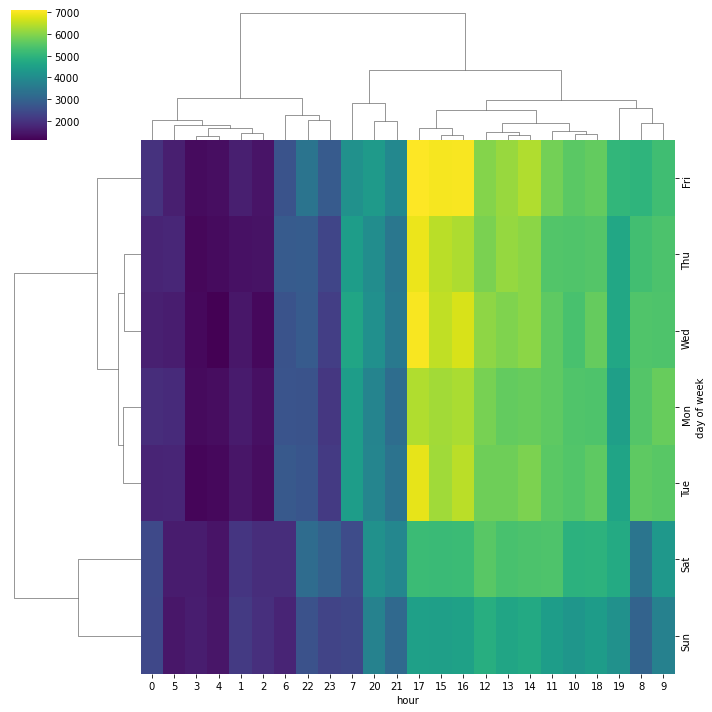

In [67]:
sns.clustermap(dayhour, cmap='viridis')